In [188]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 
import os  

# Splitting Data
from sklearn.model_selection import train_test_split  

## Feature Selection
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier   
from sklearn.naive_bayes import GaussianNB  

# Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
File_Path = os.path.join(os.getcwd(), 'heart_disease_uci_encoding.csv')
df = pd.read_csv(File_Path)
df.head()

,age,gender,dataset,chest_pain_type,resting_blood_pressure,fasting_blood_sugar,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,num,age_cholesterol_ratio,bp_cholesterol_ratio,heart_rate_stress,risk_index
0,63,1,0,3,145.0,1,150.0,0,2.3,0,0.269231,0.619658,2.343750,228.0
1,67,1,0,0,160.0,0,108.0,1,1.5,1,0.233449,0.557491,1.588235,338.0
2,67,1,0,0,120.0,0,129.0,1,2.6,1,0.291304,0.521739,1.897059,220.0
3,37,1,0,2,130.0,0,187.0,0,3.5,0,0.147410,0.517928,4.921053,193.0
4,41,0,0,1,130.0,0,172.0,0,1.4,0,0.200000,0.634146,4.095238,162.0


### Splitting Data

In [4]:
X = df.drop(columns = ['num'])
y = df['num']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

In [6]:
print(f'shape of X train --> {X_train.shape}')
print(f'shape of X test --> {X_test.shape}')
print(f'shape of y train --> {y_train.shape}')
print(f'shape of y test --> {y_test.shape}')

shape of X train --> (734, 13)
shape of X test --> (184, 13)
shape of y train --> (734,)
shape of y test --> (184,)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [16]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

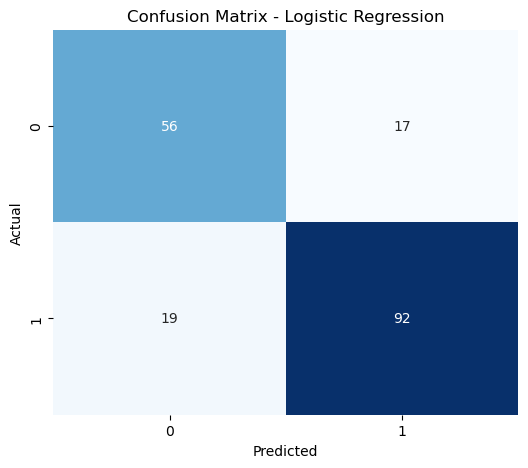

In [18]:
## confusion_matrix in Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(6,5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [20]:
## Accurecy on test data
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_percent = accuracy_log_reg * 100

print(f"Accuracy log_reg: {accuracy_percent:.2f}%")

Accuracy log_reg: 80.43%


In [22]:
# accuracy on training data
y_train_pred_log_reg = log_reg.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred_log_reg) * 100

print(f"Train Accuracy log_reg: {accuracy_train:.2f}%")

Train Accuracy log_reg: 81.06%


In [24]:
## Precision
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='micro')
precision_percent = precision_log_reg * 100

print(f"Precision log_reg: {precision_percent:.2f}%")

Precision log_reg: 80.43%


In [26]:
## Recall
recall_precision_log_reg = recall_score(y_test, y_pred_log_reg, average='micro')
recall_percent = recall_precision_log_reg * 100

print(f"Recall log_reg: {recall_percent:.2f}%")

Recall log_reg: 80.43%


In [28]:
## f1 Score
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='macro')
f1_percent = f1_log_reg * 100

print(f"F1 log_reg: {f1_percent:.2f}%")

F1 log_reg: 79.66%


## Nearest Neighbors

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

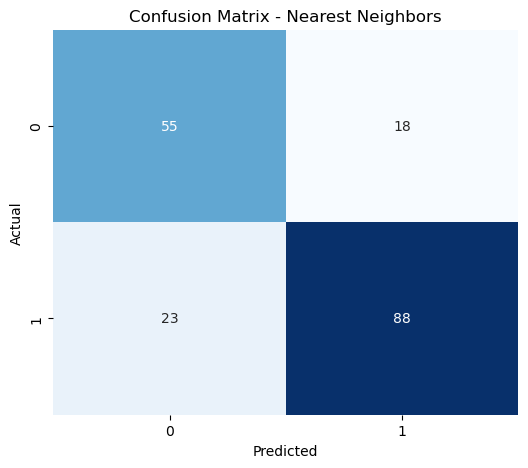

In [33]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Nearest Neighbors')
plt.show()

In [35]:
## Accurecy on test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_percent_knn = accuracy_knn * 100

print(f"Accuracy knn: {accuracy_percent_knn:.2f}%")

Accuracy knn: 77.72%


In [37]:
# Accuracy on train data
y_train_pred_knn = knn.predict(X_train_scaled)
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn) * 100
print(f"Train Accuracy knn: {accuracy_train_knn:.2f}%")

Train Accuracy knn: 85.56%


In [39]:
## Precision
precision_knn = precision_score(y_test, y_pred_knn, average='micro')
precision_percent_knn = precision_knn * 100

print(f"Precision knn: {precision_percent_knn:.2f}%")

Precision knn: 77.72%


In [41]:
## Recall
recall_precision__knn = recall_score(y_test, y_pred_knn, average='micro')
recall_percent_knn = recall_precision__knn * 100

print(f"Recall knn: {recall_percent_knn:.2f}%")

Recall knn: 77.72%


In [43]:
## f1 Score
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_percent_knn = f1_knn * 100

print(f"F1 knn: {f1_percent_knn:.2f}%")

F1 knn: 76.98%


## Support Vectors

In [46]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [48]:
## Accurecy on test data
accuracy_SVM = accuracy_score(y_test, y_pred_svm)
accuracy_percent_svm = accuracy_SVM * 100

print(f"Accuracy svm_model: {accuracy_percent_svm:.2f}%")

Accuracy svm_model: 80.98%


In [50]:
# Accuracy on train data
y_train_pred_svm = svm_model.predict(X_train_scaled)
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm) * 100
print(f"Train Accuracy svm_model: {accuracy_train_svm:.2f}%")

Train Accuracy svm_model: 85.97%


In [52]:
## Precision
precision_svm = precision_score(y_test, y_pred_svm, average='micro')
precision_percent_svm = precision_svm * 100

print(f"Precision svm_model: {precision_percent_svm:.2f}%")

Precision svm_model: 80.98%


In [54]:
## Recall
recall_precision__svm = recall_score(y_test, y_pred_svm, average='micro')
recall_percent_svm = recall_precision__svm * 100

print(f"Recall svm_model: {recall_percent_svm:.2f}%")

Recall svm_model: 80.98%


In [56]:
## f1 Score
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
f1_percent_svm = f1_svm * 100

print(f"F1 svm_model: {f1_percent_svm:.2f}%")

F1 svm_model: 79.98%


## Nu SVC

In [59]:
nu_svc = NuSVC(nu=0.1, kernel='rbf', gamma='scale')
nu_svc.fit(X_train_scaled, y_train)

y_pred_nu_svc = nu_svc.predict(X_test_scaled)

In [61]:
## Accurecy on test data
accuracy_nu_svc = accuracy_score(y_test, y_pred_nu_svc)
accuracy_percent_nu_svc = accuracy_nu_svc * 100

print(f"Accuracy nu_svc: {accuracy_percent_nu_svc:.2f}%")

Accuracy nu_svc: 65.76%


In [63]:
# Accuracy on train data
y_train_pred_nu_svc = nu_svc.predict(X_train_scaled)
accuracy_train_nu_svc = accuracy_score(y_train, y_train_pred_nu_svc) * 100
print(f"Train Accuracy nu_svc: {accuracy_train_nu_svc:.2f}%")

Train Accuracy nu_svc: 99.46%


In [65]:
## Precision
precision_nu_svc = precision_score(y_test, y_pred_nu_svc, average='micro')
precision_percent_nu_svc = precision_nu_svc * 100

print(f"Precision nu_svc: {precision_percent_nu_svc:.2f}%")

Precision nu_svc: 65.76%


In [67]:
## Recall
recall_precision__nu_svc = recall_score(y_test, y_pred_nu_svc, average='micro')
recall_percent_nu_svc = recall_precision__nu_svc * 100

print(f"Recall nu_svc: {recall_percent_nu_svc:.2f}%")

Recall nu_svc: 65.76%


In [69]:
## f1 Score
f1_nu_svc = f1_score(y_test, y_pred_nu_svc, average='macro')
f1_percent_nu_svc = f1_nu_svc * 100

print(f"F1 nu_svc: {f1_percent_nu_svc:.2f}%")

F1 nu_svc: 64.48%


## Decision Tree

In [72]:
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dec_tree.fit(X_train, y_train)

y_pred_dec_tree = dec_tree.predict(X_test)

In [74]:
## Accurecy on test data
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
accuracy_percent_dec_tree = accuracy_dec_tree * 100

print(f"Accuracy dec_tree: {accuracy_percent_dec_tree:.2f}%")

Accuracy dec_tree: 73.91%


In [78]:
# Accuracy on train data
y_train_pred_dec_tree = dec_tree.predict(X_train)
accuracy_train_dec_tree = accuracy_score(y_train, y_train_pred_dec_tree) * 100
print(f"Train Accuracy dec_tree: {accuracy_train_dec_tree:.2f}%")

Train Accuracy dec_tree: 84.60%


In [80]:
## Precision
precision_dec_tree = precision_score(y_test, y_pred_dec_tree, average='micro')
precision_percent_dec_tree = precision_dec_tree * 100

print(f"Precision dec_tree: {precision_percent_dec_tree:.2f}%")

Precision dec_tree: 73.91%


In [82]:
## Recall
recall_precision__dec_tree = recall_score(y_test, y_pred_dec_tree, average='micro')
recall_percent_dec_tree = recall_precision__dec_tree * 100

print(f"Recall dec_tree: {recall_percent_dec_tree:.2f}%")

Recall dec_tree: 73.91%


In [84]:
## f1 Score
f1_dec_tree = f1_score(y_test, y_pred_dec_tree, average='macro')
f1_percent_dec_tree = f1_dec_tree * 100

print(f"F1 dec_tree: {f1_percent_dec_tree:.2f}%")

F1 dec_tree: 73.29%


## Random Forest

In [87]:
rand_forest = RandomForestClassifier(
    n_estimators=100,    
    criterion='gini',    
    max_depth=None,    
    random_state=42
)

rand_forest.fit(X_train, y_train)

y_pred_rand_forest = rand_forest.predict(X_test)

In [89]:
## Accurecy on test data
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
accuracy_percent_rand_forest = accuracy_rand_forest * 100

print(f"Accuracy rand_forest: {accuracy_percent_rand_forest:.2f}%")

Accuracy rand_forest: 80.98%


In [91]:
# Accuracy on train data
y_train_pred_rand_forest = rand_forest.predict(X_train)
accuracy_train_rand_forest = accuracy_score(y_train, y_train_pred_rand_forest) * 100
print(f"Train Accuracy rand_forest: {accuracy_train_rand_forest:.2f}%")

Train Accuracy rand_forest: 100.00%


In [93]:
## Precision
precision_accuracy_rand_forest = precision_score(y_test, y_pred_rand_forest, average='micro')
precision_percent_rand_forest = precision_accuracy_rand_forest * 100

print(f"Precision rand_forest: {precision_percent_rand_forest:.2f}%")

Precision rand_forest: 80.98%


In [95]:
## Recall
recall_precision__dec_tree = recall_score(y_test, y_pred_dec_tree, average='micro')
recall_percent_dec_tree = recall_precision__dec_tree * 100

print(f"Recall rand_forest: {recall_percent_dec_tree:.2f}%")

Recall rand_forest: 73.91%


In [97]:
## f1 Score
f1_rand_forest = f1_score(y_test, y_pred_rand_forest, average='macro')
f1_percent_rand_forest = f1_rand_forest* 100

print(f"F1 rand_forest: {f1_percent_rand_forest:.2f}%")

F1 rand_forest: 80.18%


## AdaBoost

In [100]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

AdaBoost = AdaBoostClassifier(
    estimator=base_estimator, 
    n_estimators=100,          
    learning_rate=1.0,    
    random_state=42
)

AdaBoost.fit(X_train, y_train)

y_pred_AdaBoost = AdaBoost.predict(X_test)

In [102]:
## Accurecy on test data
accuracy_AdaBoost = accuracy_score(y_test, y_pred_AdaBoost)
accuracy_percent_AdaBoost = accuracy_AdaBoost * 100

print(f"Accuracy base_estimator: {accuracy_percent_AdaBoost:.2f}%")

Accuracy base_estimator: 82.61%


In [104]:
# Accuracy on train data
y_train_pred_AdaBoost = AdaBoost.predict(X_train)
accuracy_train_AdaBoost = accuracy_score(y_train, y_train_pred_AdaBoost) * 100
print(f"Train Accuracy base_estimator: {accuracy_train_AdaBoost:.2f}%")

Train Accuracy base_estimator: 83.79%


In [106]:
## Precision
precision_accuracy_AdaBoost = precision_score(y_test, y_pred_AdaBoost, average='micro')
precision_percent_AdaBoost = precision_accuracy_AdaBoost * 100

print(f"Precision base_estimator: {precision_percent_AdaBoost:.2f}%")

Precision base_estimator: 82.61%


In [108]:
## Recall
recall_precision__AdaBoost = recall_score(y_test, y_pred_AdaBoost, average='micro')
recall_percent_AdaBoost = recall_precision__AdaBoost * 100

print(f"Recall base_estimator: {recall_percent_AdaBoost:.2f}%")

Recall base_estimator: 82.61%


In [110]:
## f1 Score
f1_AdaBoost= f1_score(y_test, y_pred_AdaBoost, average='macro')
f1_percent_AdaBoost= f1_AdaBoost * 100

print(f"F1 base_estimator: {f1_percent_AdaBoost:.2f}%")

F1 base_estimator: 81.83%


## Gradient Boosting

In [113]:
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

In [115]:
## Accurecy on test data
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_percent_gb = accuracy_gb * 100

print(f"Accuracy gb: {accuracy_percent_gb:.2f}%")

Accuracy gb: 79.35%


In [119]:
# Accuracy on train data
y_train_pred_gb = gb.predict(X_train)
accuracy_train_gb = accuracy_score(y_train, y_train_pred_gb) * 100
print(f"Train Accuracy gb: {accuracy_train_gb:.2f}%")

Train Accuracy gb: 92.10%


In [121]:
## Precision
precision_accuracy_gb = precision_score(y_test, y_pred_gb, average='micro')
precision_percent_gb = precision_accuracy_gb * 100

print(f"Precision gb: {precision_percent_gb:.2f}%")

Precision gb: 79.35%


In [123]:
## Recall
recall_precision__gb = recall_score(y_test, y_pred_gb, average='micro')
recall_percent_gb = recall_precision__gb * 100

print(f"Recall gb: {recall_percent_gb:.2f}%")

Recall gb: 79.35%


In [125]:
## f1 Score
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
f1_percent_gb= f1_gb * 100

print(f"F1 gb: {f1_percent_gb:.2f}%")

F1 gb: 78.70%


## Naive Bayes

In [128]:
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

y_pred_naive_bayes = naive_bayes.predict(X_test)

In [130]:
## Accurecy on test data
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_percent_naive_bayes = accuracy_naive_bayes * 100

print(f"Accuracy naive_bayes: {accuracy_percent_naive_bayes:.2f}%")

Accuracy naive_bayes: 78.26%


In [132]:
# Accuracy on train data
y_train_pred_naive_bayes = naive_bayes.predict(X_train)
accuracy_train_naive_bayes = accuracy_score(y_train, y_train_pred_naive_bayes) * 100
print(f"Train Accuracy naive_bayes: {accuracy_train_naive_bayes:.2f}%")

Train Accuracy naive_bayes: 77.52%


In [134]:
## Precision
precision_accuracy_naive_bayes = precision_score(y_test, y_pred_naive_bayes, average='micro')
precision_percent_naive_bayes = precision_accuracy_naive_bayes * 100

print(f"Precision naive_bayes: {precision_percent_naive_bayes:.2f}%")

Precision naive_bayes: 78.26%


In [136]:
## Recall
recall_precision__naive_bayes = recall_score(y_test, y_pred_naive_bayes, average='micro')
recall_percent_naive_bayes = recall_precision__naive_bayes * 100

print(f"Recall naive_bayes: {recall_percent_naive_bayes:.2f}%")

Recall naive_bayes: 78.26%


In [138]:
## f1 Score
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes, average='macro')
f1_percent_naive_bayes = f1_naive_bayes* 100

print(f"F1 naive_bayes: {f1_percent_naive_bayes:.2f}%")

F1 naive_bayes: 77.29%


In [144]:
models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "SVM": svm_model,
    "NuSVC": nu_svc,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest,
    "AdaBoost": AdaBoost,
    "Gradient Boosting": gb,
    "Naive Bayes": naive_bayes
}

In [146]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

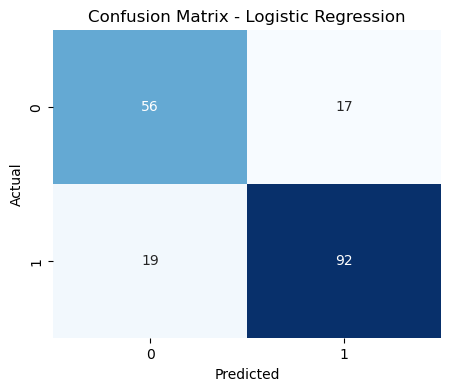

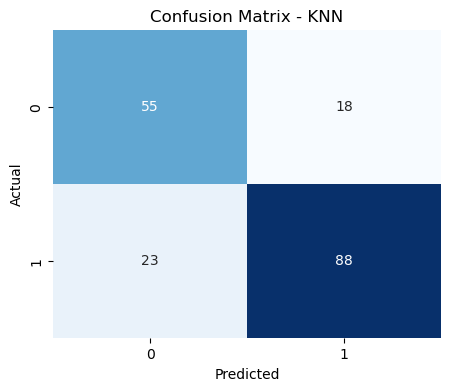

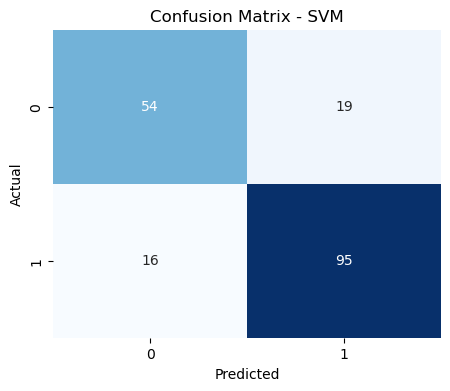

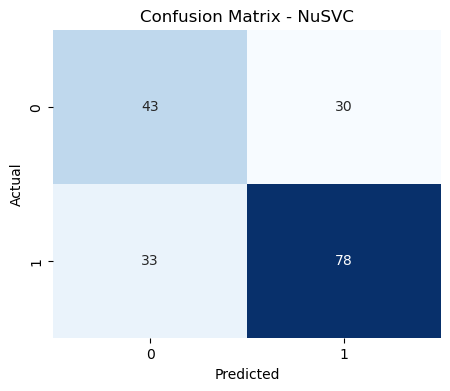

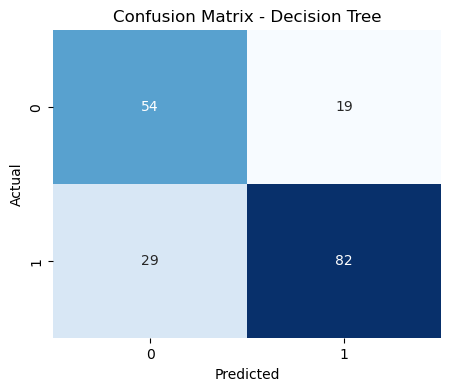

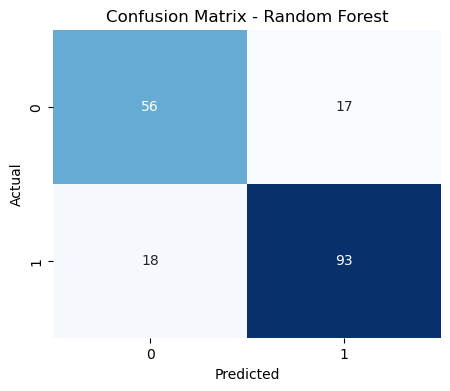

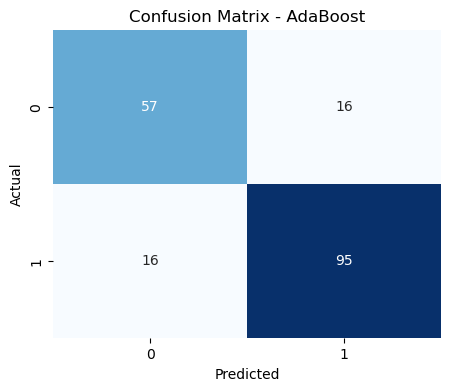

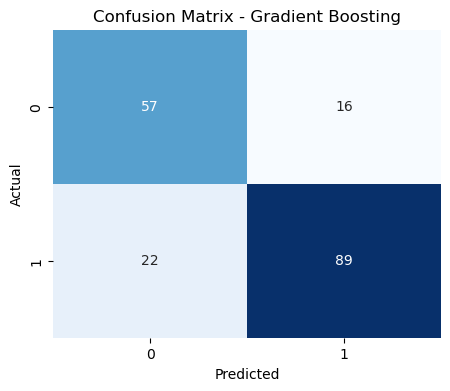

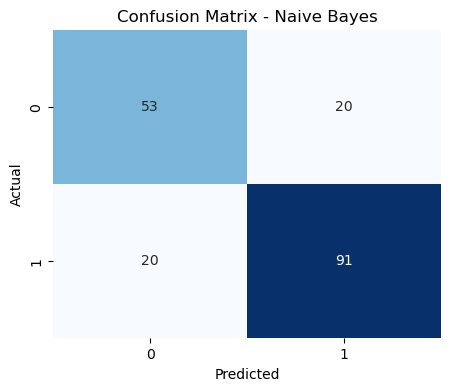

In [148]:
for name, model in models.items():
    if name in ["KNN", "SVM", "NuSVC", "Logistic Regression"]:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred) * 100)
    metrics["Precision"].append(precision_score(y_test, y_pred, average='micro') * 100)
    metrics["Recall"].append(recall_score(y_test, y_pred, average='micro') * 100)
    metrics["F1"].append(f1_score(y_test, y_pred, average='macro') * 100)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [150]:
df_metrics = pd.DataFrame(metrics)

In [154]:
df_metrics

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,80.434783,80.434783,80.434783,79.656020
1,KNN,77.717391,77.717391,77.717391,76.976836
2,SVM,80.978261,80.978261,80.978261,79.984460
3,NuSVC,65.760870,65.760870,65.760870,64.475499
4,Decision Tree,73.913043,73.913043,73.913043,73.294630
5,Random Forest,80.978261,80.978261,80.978261,80.176686
6,AdaBoost,82.608696,82.608696,82.608696,81.833889
7,Gradient Boosting,79.347826,79.347826,79.347826,78.703704
8,Naive Bayes,78.260870,78.260870,78.260870,77.292361


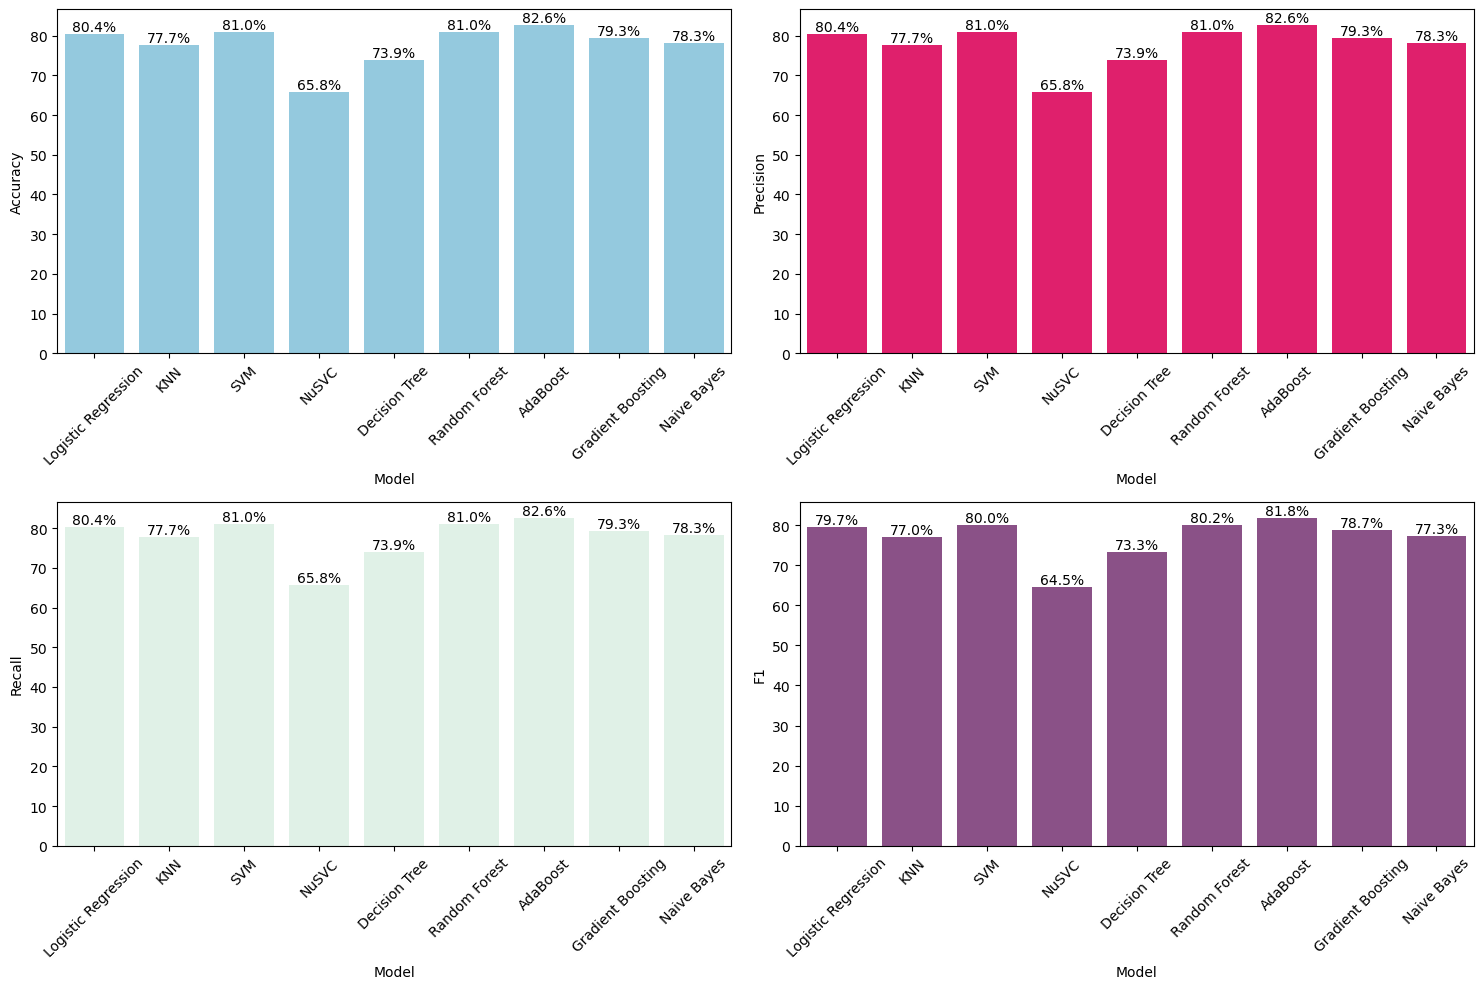

In [164]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

bars1 = sns.barplot(x="Model", y="Accuracy", data=df_metrics, ax=ax[0,0], color='skyblue')
for p in bars1.patches:
    bars1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)
ax[0,0].tick_params(axis='x', rotation=45)

bars2 = sns.barplot(x="Model", y="Precision", data=df_metrics, ax=ax[0,1], color='#FF0066')
for p in bars2.patches:
    bars2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)
ax[0,1].tick_params(axis='x', rotation=45)

bars3 = sns.barplot(x="Model", y="Recall", data=df_metrics, ax=ax[1,0], color='#DDF4E7')
for p in bars3.patches:
    bars3.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)
ax[1,0].tick_params(axis='x', rotation=45)

bars4 = sns.barplot(x="Model", y="F1", data=df_metrics, ax=ax[1,1], color='#934790')
for p in bars4.patches:
    bars4.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)
ax[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

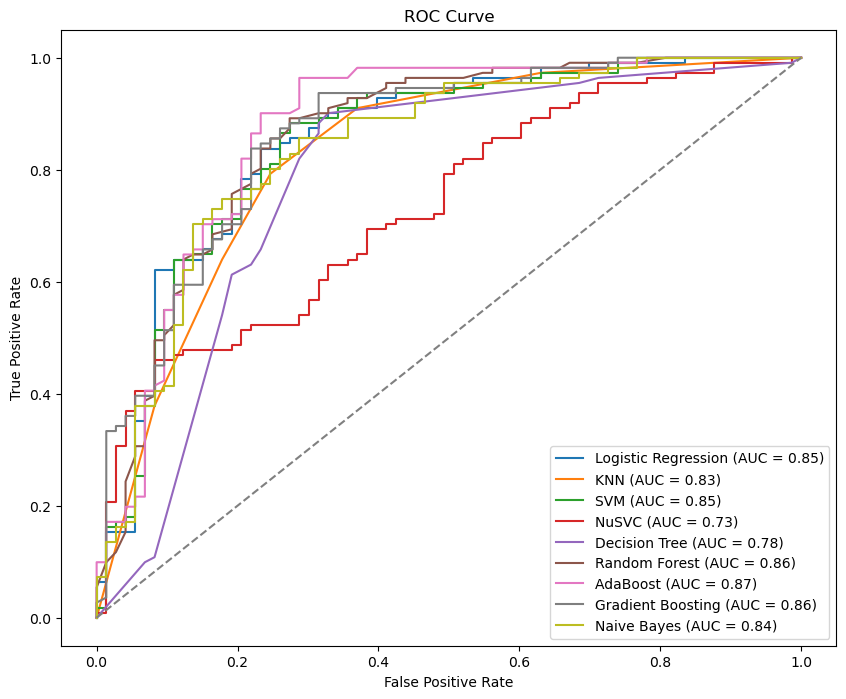

In [177]:
plt.figure(figsize=(10,8))

for name, model in models.items():
    if name in ["KNN", "SVM", "NuSVC", "Logistic Regression"]:
        X_te = X_test_scaled
        X_tr = X_train_scaled
    else:
        X_te = X_test
        X_tr = X_train
    
    model.fit(X_tr, y_train)
    
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_te)[:,1]
    else:
        y_scores = model.decision_function(X_te)
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()